# Assignment 1

Cifar-10 classification with Convolutional Neural Networks

We were given a sample CNN notebook for MNIST (recognizing numbers) which we had to adapt for Cifar-10 (categorizing 10 different image classes). Minimal acceptable target was 75% validation accuracy while ideal target was 82% or above. We managed to hit above 85% in our final model which we deemed to be as good as it possibly could get.

Importing necessary libraries.

In [1]:
import os
os.environ["KERAS_BACKEND"] = "tensorflow"

import keras
from keras import layers
from keras import backend as K

import numpy as np
import matplotlib.pyplot as plt

I0000 00:00:1762110186.712782   65894 port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
I0000 00:00:1762110186.867694   65894 cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI AVX512_BF16 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
I0000 00:00:1762110188.846173   65894 port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


Input image size is 32x32 pixels with 3 colour RGB channels yielding total of 3072 units for our input layer.

In [2]:
# Cifar-10 images have 10 distinct classes, image input in 32x32x3
num_classes = 10
input_shape = (32, 32, 3)

# Load the data and split it between train and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

# Add model target labels to a list
targets = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
# Make sure images have shape (32, 32, 3)
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


First convolutional block consists of 32 filters, second of 64 filters, both 3x3 pixels each. The input is flattened from 3 dimensions to just 1 so that it can be fed into the model. Finally 50% of neurons are dropped during the training in order to help the model generalize into non-trainset data.

In [3]:
# Create the model
inputs = keras.Input(shape=input_shape)
x = keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu')(inputs)
x = keras.layers.MaxPooling2D(pool_size=(2, 2))(x)
x = keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu')(x)
x = keras.layers.MaxPooling2D(pool_size=(2, 2))(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(num_classes, activation="softmax")(x)

model = keras.Model(inputs=inputs, outputs=outputs, name="cifar10_model")

W0000 00:00:1762110195.066398   65894 gpu_device.cc:2456] TensorFlow was not built with CUDA kernel binaries compatible with compute capability 12.0a. CUDA kernels will be jit-compiled from PTX, which could take 30 minutes or longer.
W0000 00:00:1762110195.071916   65894 gpu_device.cc:2456] TensorFlow was not built with CUDA kernel binaries compatible with compute capability 12.0a. CUDA kernels will be jit-compiled from PTX, which could take 30 minutes or longer.
I0000 00:00:1762110195.355831   65894 gpu_device.cc:2040] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13121 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 5070 Ti, pci bus id: 0000:01:00.0, compute capability: 12.0a


In [4]:
model.summary()


Model: "cifar10_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 10)             │        23,050 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 42,442 (165.79 KB)

 Trainable params: 42,442 (165.79 KB)

 Non-trainable params: 0 (0.00 B)

Model is compiled using Categorical Crossentropy as loss function and Adam as optimizer.

In [5]:
batch_size = 4
epochs = 5

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/5


I0000 00:00:1762110197.472025   66176 service.cc:158] XLA service 0x73f270033450 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1762110197.472064   66176 service.cc:166]   StreamExecutor device (0): NVIDIA GeForce RTX 5070 Ti, Compute Capability 12.0a
I0000 00:00:1762110197.483966   66176 dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1762110197.550816   66176 cuda_dnn.cc:463] Loaded cuDNN version 91002


   88/11250 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step - accuracy: 0.0783 - loss: 2.3423

I0000 00:00:1762110198.959466   66176 device_compiler.h:208] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


11250/11250 ━━━━━━━━━━━━━━━━━━━━ 25s 2ms/step - accuracy: 0.4551 - loss: 1.5173 - val_accuracy: 0.5858 - val_loss: 1.1705
Epoch 2/5
11250/11250 ━━━━━━━━━━━━━━━━━━━━ 24s 2ms/step - accuracy: 0.5594 - loss: 1.2544 - val_accuracy: 0.6116 - val_loss: 1.1255
Epoch 3/5
11250/11250 ━━━━━━━━━━━━━━━━━━━━ 23s 2ms/step - accuracy: 0.5895 - loss: 1.1791 - val_accuracy: 0.6486 - val_loss: 1.0140
Epoch 4/5
11250/11250 ━━━━━━━━━━━━━━━━━━━━ 23s 2ms/step - accuracy: 0.6035 - loss: 1.1342 - val_accuracy: 0.6564 - val_loss: 1.0022
Epoch 5/5
11250/11250 ━━━━━━━━━━━━━━━━━━━━ 23s 2ms/step - accuracy: 0.6189 - loss: 1.0981 - val_accuracy: 0.6526 - val_loss: 1.0029


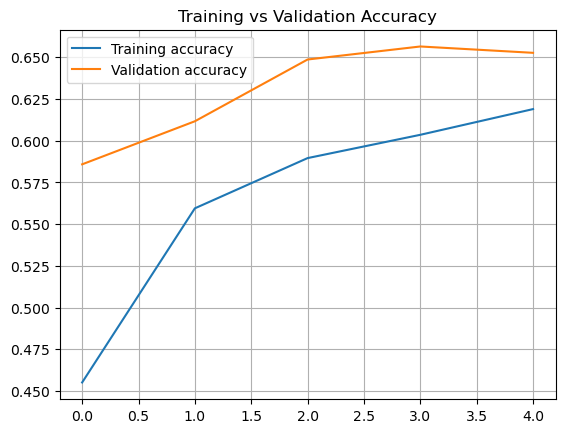

In [6]:
plt.title("Training vs Validation Accuracy")
plt.plot(history.history["accuracy"], label="Training accuracy")
plt.plot(history.history["val_accuracy"], label="Validation accuracy")
plt.locator_params(axis='x', nbins=10)  # limit number of xbins to prevent numbers being on top of each others
plt.legend()
plt.grid()
plt.show()

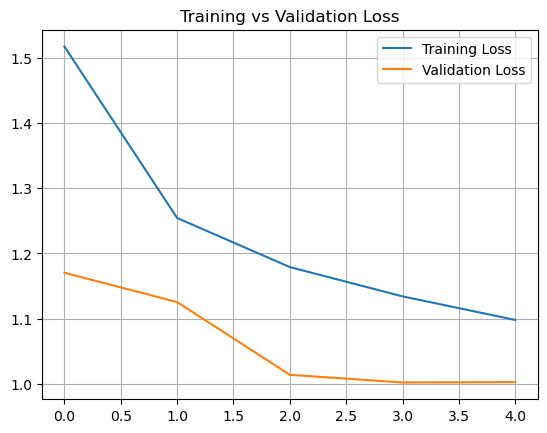

In [7]:
plt.title("Training vs Validation Loss")
plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
epoch_run = range(1, len(history.history['loss']))
plt.locator_params(axis='x', nbins=10)  # limit number of xbins to prevent numbers being on top of each others
plt.legend()
plt.grid()
plt.show()

Results of the CNN model before introducing custom layers.

In [8]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])
print("Final training accuracy:", history.history['accuracy'][-1])
print("Final training loss:", history.history['loss'][-1])

print("Final validation accuracy:", history.history['val_accuracy'][-1])
print("Final validation loss:", history.history['val_loss'][-1])

Test loss: 1.0218387842178345
Test accuracy: 0.6435999870300293
Final training accuracy: 0.6188889145851135
Final training loss: 1.098097562789917
Final validation accuracy: 0.6525999903678894
Final validation loss: 1.0028584003448486


Sample outputs of images.

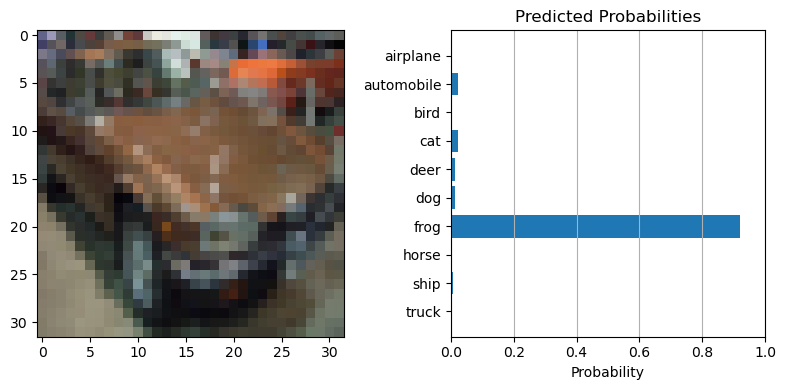

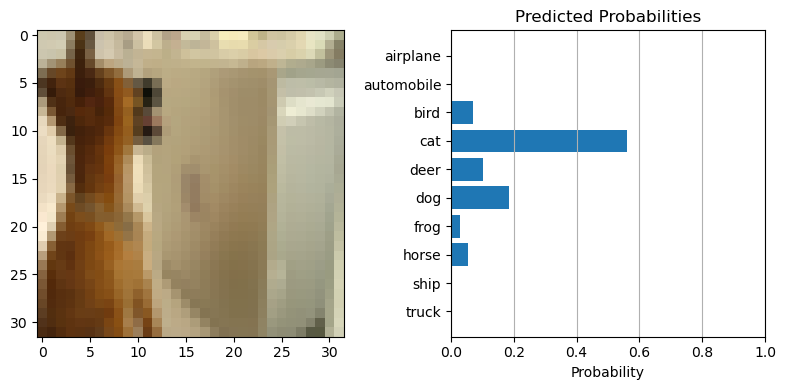

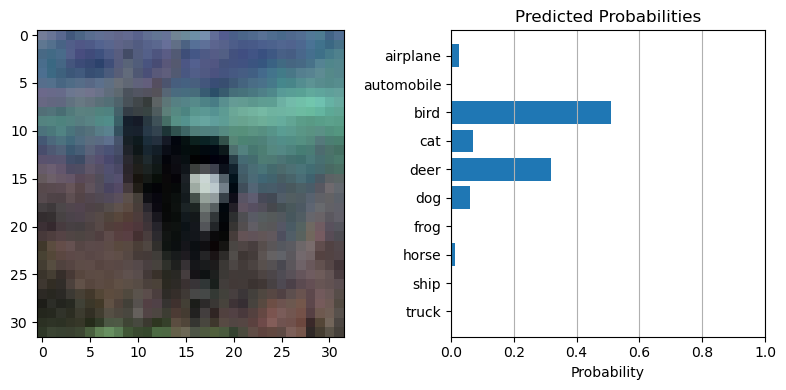

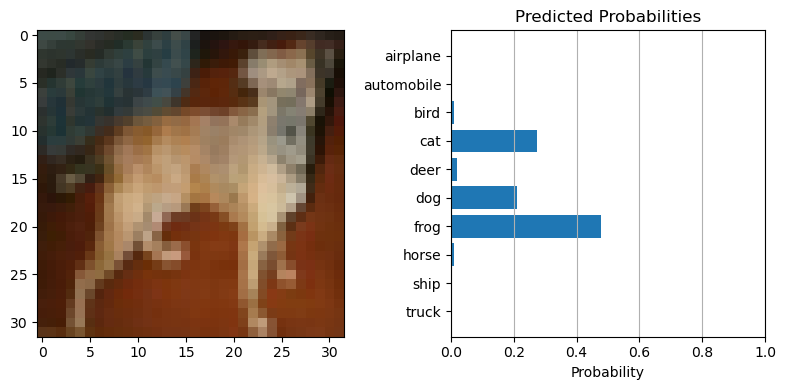

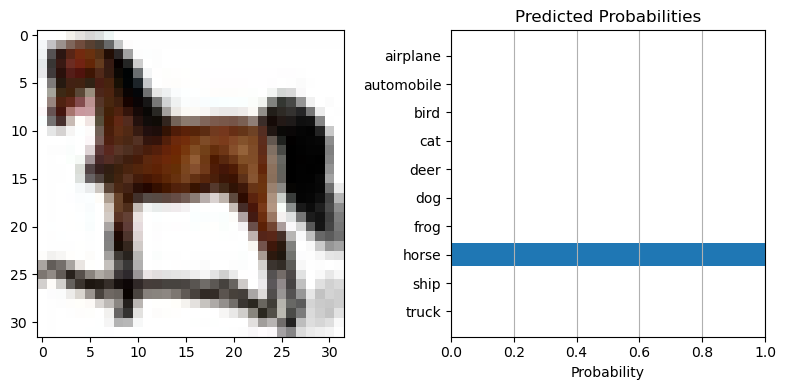

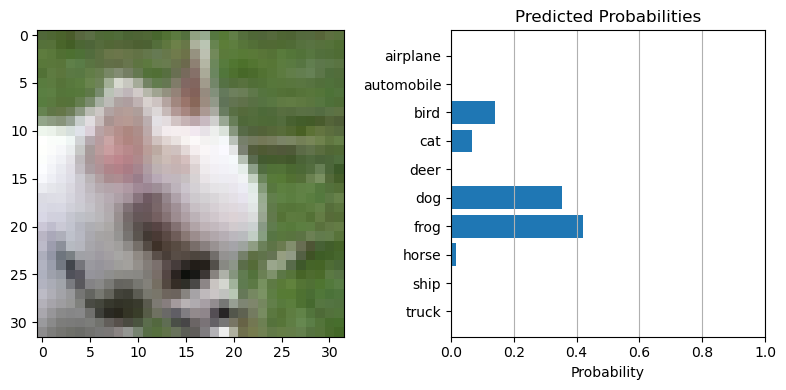

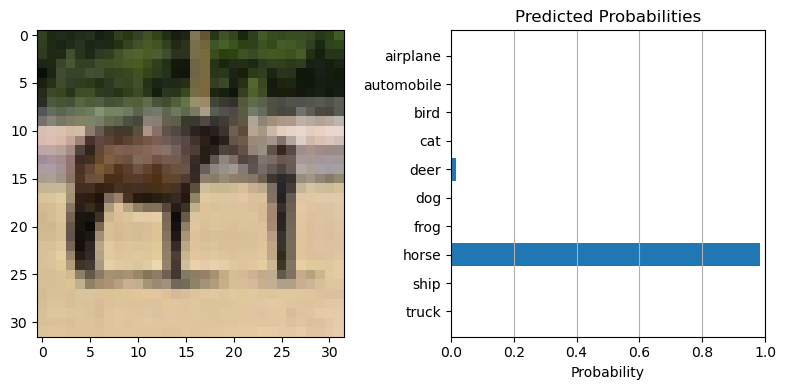

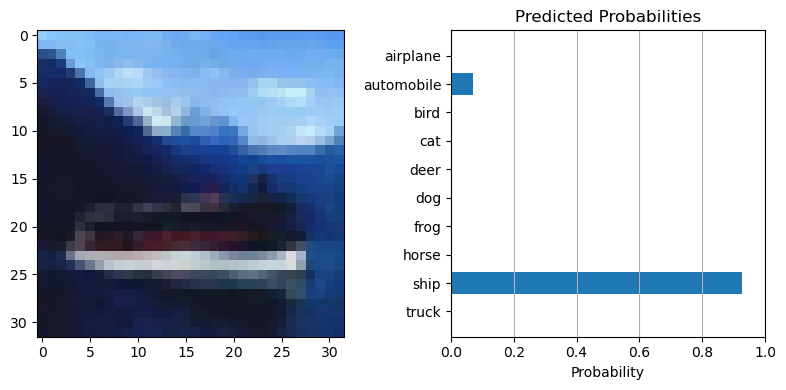

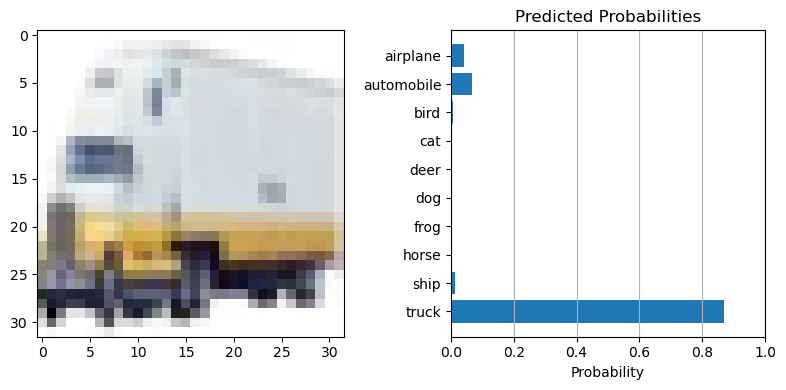

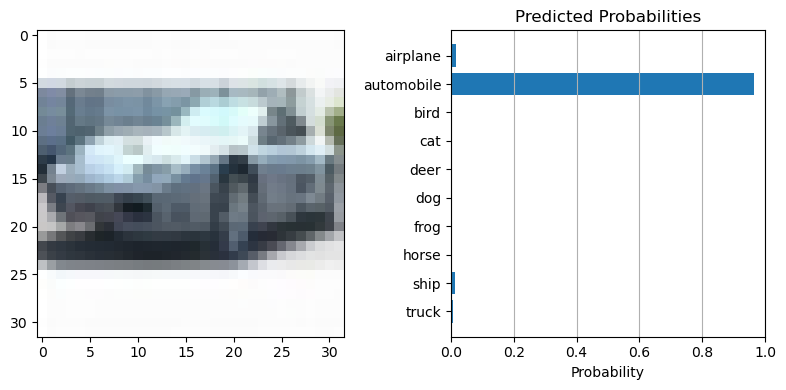

In [9]:
x = x_test
y = model(x)
start = 2000

for k in range(10):
    plt.figure(figsize=(8, 4))  # Increased figure height for better horizontal plot
    plt.subplot(1, 2, 1)
    plt.imshow(x[start + k].reshape((32, 32, 3)))
    ind = np.arange(0, 10)
    plt.subplot(1, 2, 2)
    plt.barh(ind, y[start + k].numpy().flatten())  # Use barh for horizontal bars
    plt.yticks(ind, targets)  # Use yticks for vertical labels
    plt.gca().invert_yaxis()  # Invert y-axis to have class 0 at the top
    plt.xlabel("Probability")  # Label the x-axis as probability
    plt.title("Predicted Probabilities")  # Add a title to the bar plot
    plt.xlim(0, 1)  # Set x-axis limit from 0 to 1 for probabilities
    plt.grid(axis='x')  # Add grid lines for the x-axis
    plt.tight_layout()  # Adjust layout to prevent labels overlapping
    plt.show()

# Modifying the model
---
Here we start to tinker with the parameters of the model, testing adding layers, optimizers and callbacks.





In [10]:
print(K.backend())

tensorflow


Same data as above, images of 32x32x3 size.

In [11]:
# Model / data parameters
num_classes = 10
input_shape = (32, 32, 3)

# Load the data and split it between train and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

# Add model target labels to a list
targets = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
# Make sure images have shape (32, 32, 3)
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


The model consists of progressively larger filter layers (32 -> 64 -> 128)
1. Batch normalization speeds up and improves model's generalization abilities.
2. pooling gradually downsamples the images (i.e. fewer pizels per image -> model looks for more generic features in that image).
3. Dropping 30%/50% neurons after each layer improves generalization abilities.

In [12]:
# Create the model
inputs = keras.Input(shape=input_shape)

# ---------------
x = keras.layers.Conv2D(32, kernel_size=(3, 3), use_bias=False, padding="same")(inputs)
x = layers.BatchNormalization()(x)
x = layers.Activation("relu")(x)

x = keras.layers.Conv2D(32, kernel_size=(3, 3), use_bias=False, padding="same")(x)
x = layers.BatchNormalization()(x)
x = layers.Activation("relu")(x)

x = keras.layers.MaxPooling2D(pool_size=(2, 2))(x)
x = keras.layers.Dropout(0.3)(x)
# ---------------

x = keras.layers.Conv2D(64, kernel_size=(3, 3), use_bias=False, padding="same")(x)
x = layers.BatchNormalization()(x)
x = layers.Activation("relu")(x)

x = keras.layers.Conv2D(64, kernel_size=(3, 3), use_bias=False, padding="same")(x)
x = layers.BatchNormalization()(x)
x = layers.Activation("relu")(x)

x = keras.layers.MaxPooling2D(pool_size=(2, 2))(x)
x = keras.layers.Dropout(0.5)(x)
# ---------------

x = keras.layers.Conv2D(128, kernel_size=(3, 3), use_bias=False, padding="same")(x)
x = layers.BatchNormalization()(x)
x = layers.Activation("relu")(x)

x = keras.layers.Conv2D(128, kernel_size=(3, 3), use_bias=False, padding="same")(x)
x = layers.BatchNormalization()(x)
x = layers.Activation("relu")(x)

x = keras.layers.MaxPooling2D(pool_size=(2, 2))(x)
x = keras.layers.Dropout(0.5)(x)
# ---------------

x = layers.Flatten()(x)

x = keras.layers.Dense(128)(x)
x = layers.BatchNormalization()(x)
x = layers.Activation("relu")(x)
x = keras.layers.Dropout(0.5)(x)

outputs = layers.Dense(num_classes, activation="softmax")(x)

model = keras.Model(inputs=inputs, outputs=outputs, name="cifar10_model")


In [13]:
model.summary()


Model: "cifar10_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 32, 32, 32)     │           864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 32, 32, 32)     │         9,216 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 16, 16, 64)     │        18,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 16, 16, 64)     │        36,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 8, 8, 128)      │        73,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_4 (Activation)       │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 8, 8, 128)      │       147,456 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │             

 Total params: 552,426 (2.11 MB)

 Trainable params: 551,274 (2.10 MB)

 Non-trainable params: 1,152 (4.50 KB)

Two callbacks are added, one to reduce learning rate upon reaching plateau and second to stop the model after it stops improving. Batch size 128 was chosen as a good balance between performance and model accuracy.

In [14]:

from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from keras.src.callbacks import ReduceLROnPlateau

# increased batch size and epochs to make processing faster and more reliable
batch_size = 64
epochs = 250

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5,
                              patience=5, min_lr=1e-6, verbose=1)

# increase learning rate from 0.0001
optimizer = Adam(learning_rate=0.002)
# add early stop to auto stop processing if values are not getting better
early_stop = EarlyStopping(monitor="val_loss", patience=10, restore_best_weights=True)
model.compile(loss="categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])
# change validation split to 0.2 to get better results
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.2,
                    callbacks=[early_stop, reduce_lr])


Epoch 1/250
625/625 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.4193 - loss: 1.6093 - val_accuracy: 0.5108 - val_loss: 1.3033 - learning_rate: 0.0020
Epoch 2/250
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.5771 - loss: 1.1915 - val_accuracy: 0.5044 - val_loss: 1.3897 - learning_rate: 0.0020
Epoch 3/250
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6378 - loss: 1.0260 - val_accuracy: 0.6382 - val_loss: 1.0393 - learning_rate: 0.0020
Epoch 4/250
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6737 - loss: 0.9304 - val_accuracy: 0.7298 - val_loss: 0.7557 - learning_rate: 0.0020
Epoch 5/250
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6934 - loss: 0.8709 - val_accuracy: 0.7253 - val_loss: 0.7985 - learning_rate: 0.0020
Epoch 6/250
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7175 - loss: 0.8182 - val_accuracy: 0.7516 - val_loss: 0.7086 - learning_rate: 0.0020
Epoch 7/250
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7316 - loss: 0.

Training and validation accuracy & training and validation loss. The lines converge and eventually plateau around 50-60 epocs.

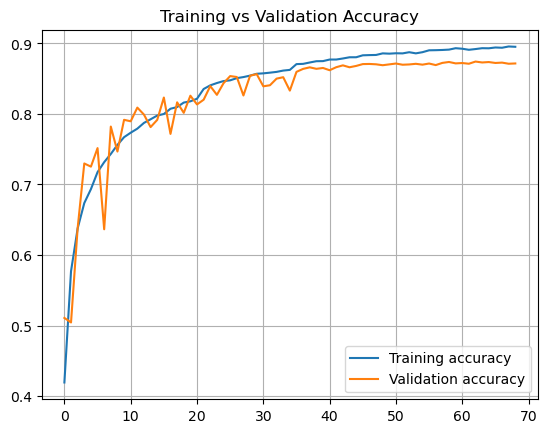

In [15]:
plt.title("Training vs Validation Accuracy")
plt.plot(history.history["accuracy"], label="Training accuracy")
plt.plot(history.history["val_accuracy"], label="Validation accuracy")
plt.locator_params(axis='x', nbins=10)  # limit number of xbins to prevent numbers being on top of each others
plt.legend()
plt.grid()
plt.show()

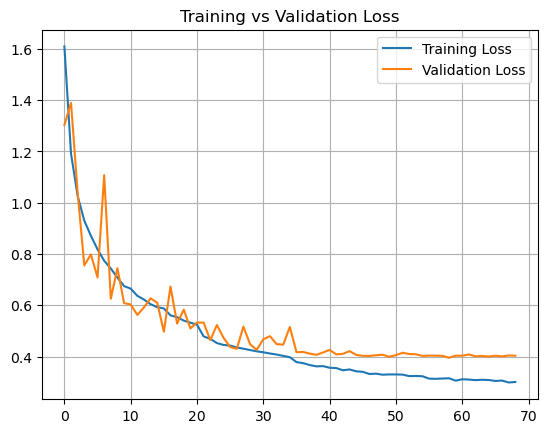

In [19]:
plt.title("Training vs Validation Loss")
plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
epoch_run = range(1, len(history.history['loss']))
plt.locator_params(axis='x', nbins=10)  # limit number of xbins to prevent numbers being on top of each others
plt.legend()
plt.grid()
plt.show()

Final accuracy & loss scores.

In [20]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])
print("Final training accuracy:", history.history['accuracy'][-1])
print("Final training loss:", history.history['loss'][-1])

print("Final validation accuracy:", history.history['val_accuracy'][-1])
print("Final validation loss:", history.history['val_loss'][-1])

Test loss: 0.42561590671539307
Test accuracy: 0.8636000156402588
Final training accuracy: 0.8952249884605408
Final training loss: 0.3010948598384857
Final validation accuracy: 0.8715999722480774
Final validation loss: 0.40357640385627747


Sample image predictions.

W0000 00:00:1762110814.041745   66177 bfc_allocator.cc:501] Allocator (GPU_0_bfc) ran out of memory trying to allocate 45.88MiB (rounded to 48112384)requested by op 
If the cause is memory fragmentation maybe the environment variable 'TF_GPU_ALLOCATOR=cuda_malloc_async' will improve the situation. 
Current allocation summary follows.
Current allocation summary follows.
I0000 00:00:1762110814.041856   66177 bfc_allocator.cc:1049] BFCAllocator dump for GPU_0_bfc
I0000 00:00:1762110814.041865   66177 bfc_allocator.cc:1056] Bin (256): 	Total Chunks: 230, Chunks in use: 230. 57.5KiB allocated for chunks. 57.5KiB in use in bin. 8.2KiB client-requested in use in bin.
I0000 00:00:1762110814.041877   66177 bfc_allocator.cc:1056] Bin (512): 	Total Chunks: 29, Chunks in use: 27. 14.5KiB allocated for chunks. 13.5KiB in use in bin. 13.5KiB client-requested in use in bin.
I0000 00:00:1762110814.041881   66177 bfc_allocator.cc:1056] Bin (1024): 	Total Chunks: 1, Chunks in use: 1. 1.2KiB allocated fo

1/1 ━━━━━━━━━━━━━━━━━━━━ 21s 21s/step


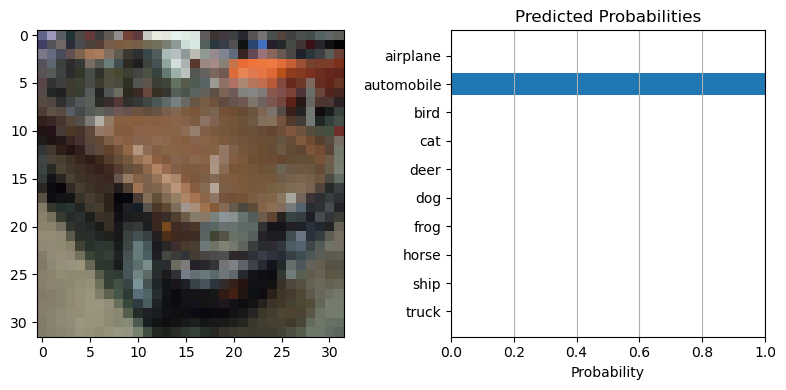

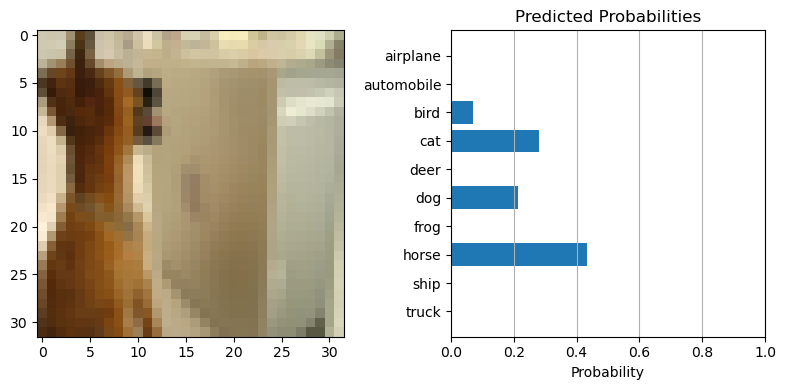

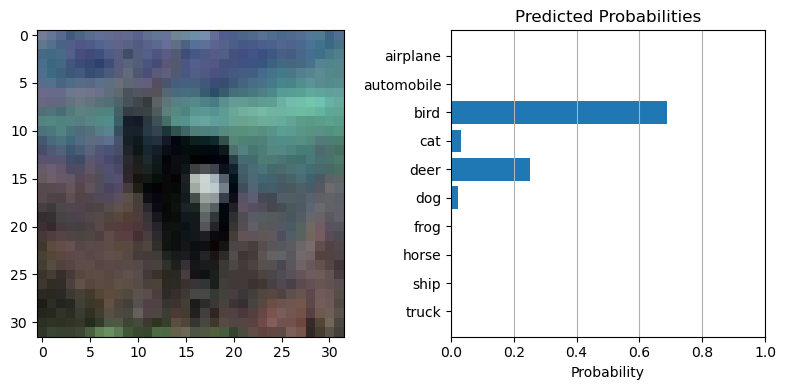

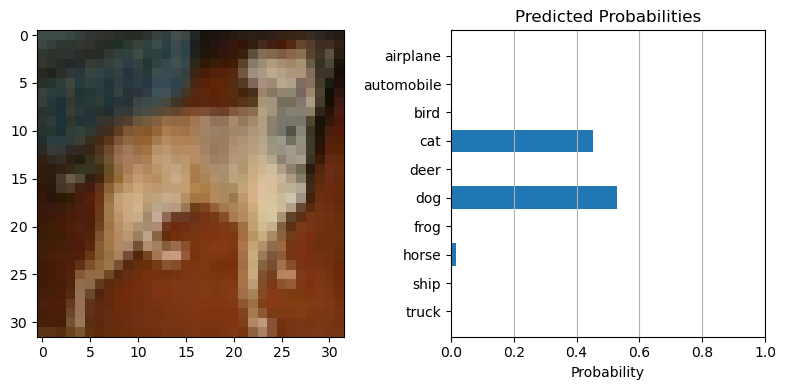

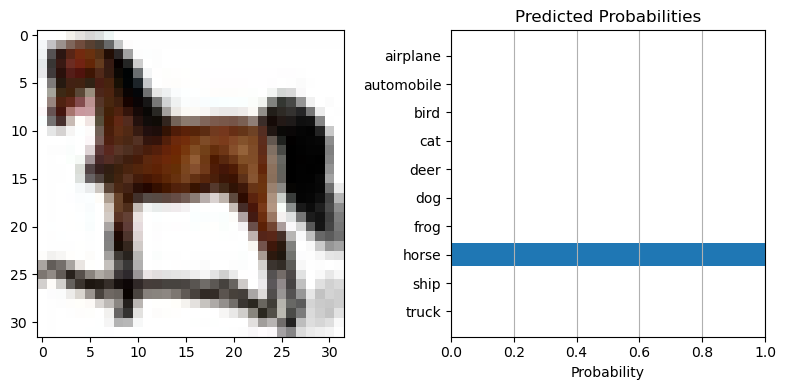

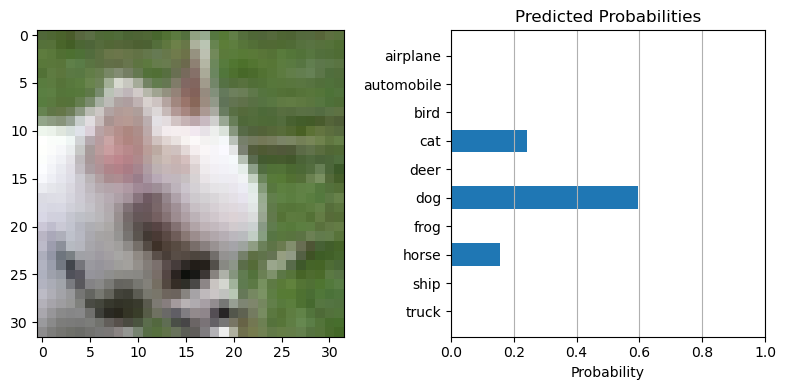

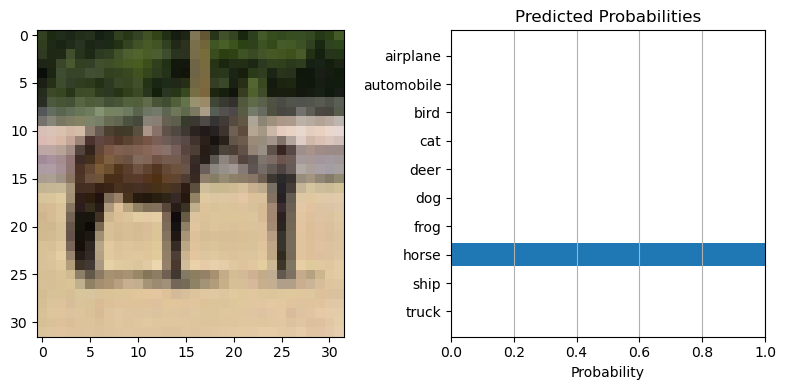

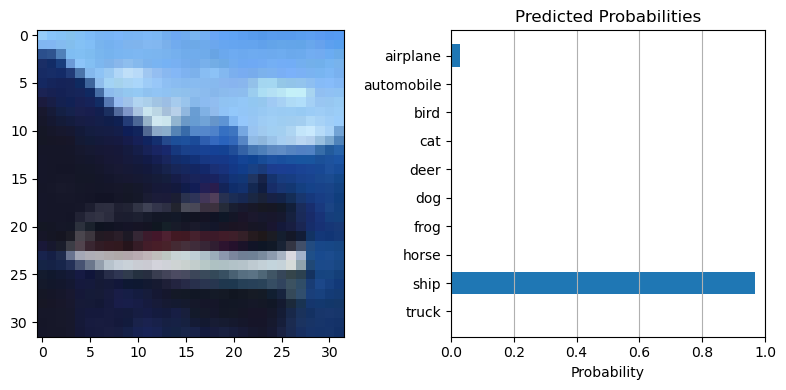

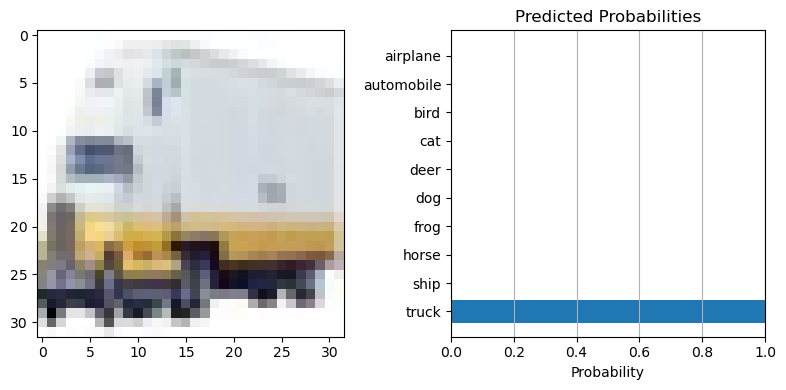

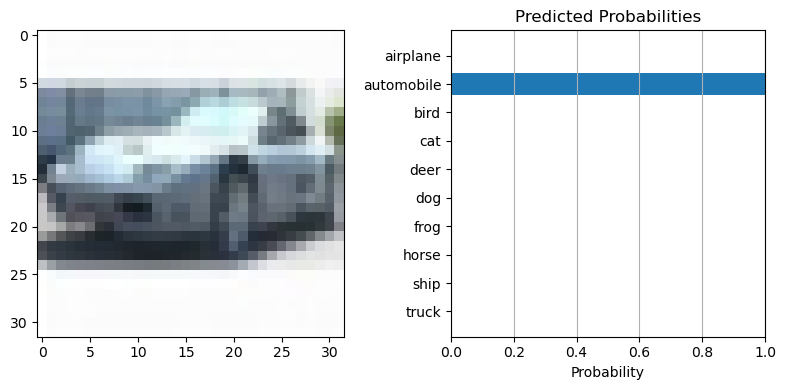

In [24]:
start = 2000

# Käytä vain ne 10 kuvaa, jotka haluat näyttää
subset = x_test[start:start+10]

# Ennusta pienessä erässä, ettei GPU-muisti lopu
y = model.predict(subset, batch_size=10)


for k in range(10):
    plt.figure(figsize=(8, 4))
    plt.subplot(1, 2, 1)
    plt.imshow(subset[k].reshape((32, 32, 3)))
    ind = np.arange(0, 10)
    plt.subplot(1, 2, 2)
    plt.barh(ind, y[k].flatten())
    plt.yticks(ind, targets)
    plt.gca().invert_yaxis()
    plt.xlabel("Probability")
    plt.title("Predicted Probabilities")
    plt.xlim(0, 1)
    plt.grid(axis='x')
    plt.tight_layout()
    plt.show()


In [ ]:
model.save('./mnist_cnn.keras')


In [ ]:
model = keras.models.load_model('mnist_cnn.keras')
